   # Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by yahoo Finance. By looking at data from the stock market, particularly some giant technology stocks and others. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the **risk of a stock**, based on its previous performance history. Predicted future stock prices through a **Monte Carlo method!**
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

## Section A - Basic Analysis of Stock Information

In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [3]:
# List of Tech_stocks for analytics
tech_list = ['SBIN.NS','INFY.NS','TCS.NS','RELIANCE.NS']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock.replace('.', '_') ] = yf.download(stock,start,end)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Let's go ahead and explore the RELIANCE.NS(Reliance Industries) Stock DataFrame to get a feel for the data.

In [4]:
RELIANCE_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,2540.000000,2542.500000,2486.250000,2503.000000,2495.486816,11041036
2022-07-21,2494.000000,2500.000000,2467.300049,2486.300049,2478.836914,7625468
2022-07-22,2500.000000,2516.300049,2495.000000,2503.100098,2495.586670,5062651
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2413.134521,10665470
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2414.231445,5216466


In [5]:
# Summary stats for Reliance Stock
RELIANCE_NS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,2491.374082,2511.273269,2468.921670,2489.716406,2489.129654,5.746931e+06
std,122.513564,124.643035,123.095343,125.333128,125.097263,2.674901e+06
min,2215.000000,2220.000000,2180.000000,2201.250000,2201.250000,0.000000e+00
25%,2398.900024,2417.700073,2371.050049,2384.549927,2384.549927,3.920363e+06
50%,2495.000000,2509.500000,2472.600098,2495.550049,2495.486816,5.087729e+06
75%,2581.824951,2604.799927,2559.174927,2580.425049,2578.075073,6.773609e+06
max,2830.000000,2856.000000,2797.000000,2841.850098,2841.850098,1.802857e+07


In [6]:
RELIANCE_NS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-07-20 to 2023-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


Now that we've seen the DataFrame, let's plot out the volume and closing price of the Reliance stocks.

<Axes: xlabel='Date'>

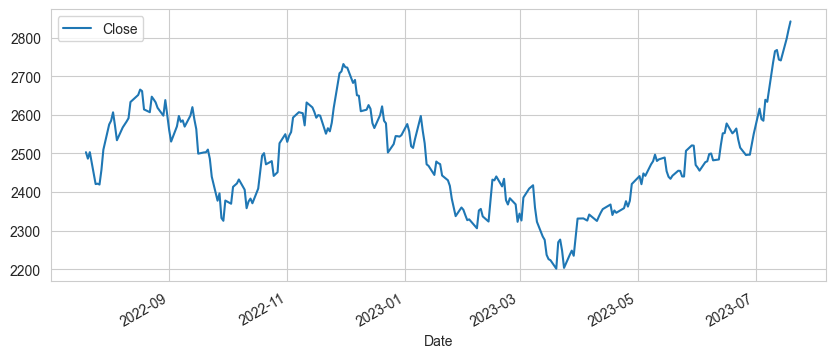

In [7]:
# Let's see a historical view of the closing price
RELIANCE_NS['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

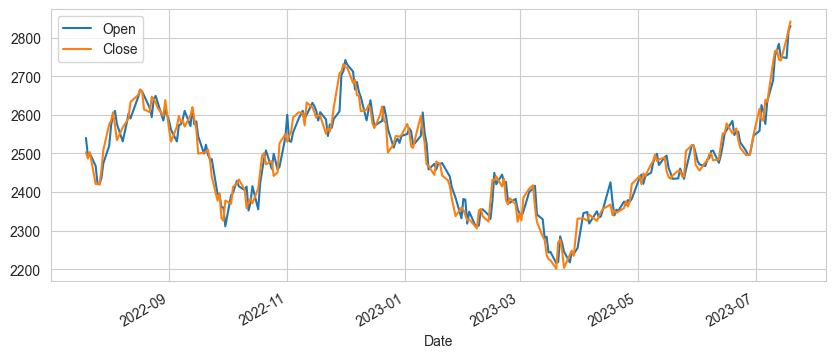

In [8]:
# Let's see a historical view of the opening and closing price
RELIANCE_NS[['Open','Close']].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

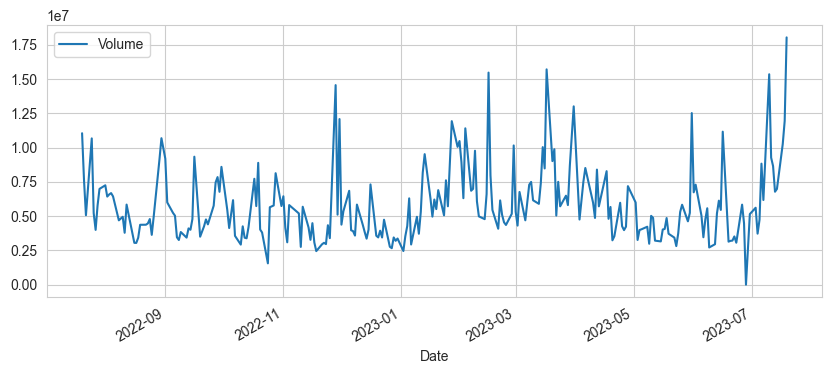

In [9]:
# Now let's plot the total volume of stock being traded each day over the past year

RELIANCE_NS['Volume'].plot(legend=True, figsize=(10,4))

We can see that in July'2023 is the higher for Reliance stock being traded.

Now that we've seen the visualizations for the closing price and the volume traded each day for RELIANCE_NS stock.
Let's go ahead and caculate the moving average for the RELIANCE_NS stock.


In [10]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    RELIANCE_NS[column_name] = (RELIANCE_NS['Close'].rolling(ma).mean())

<Axes: xlabel='Date'>

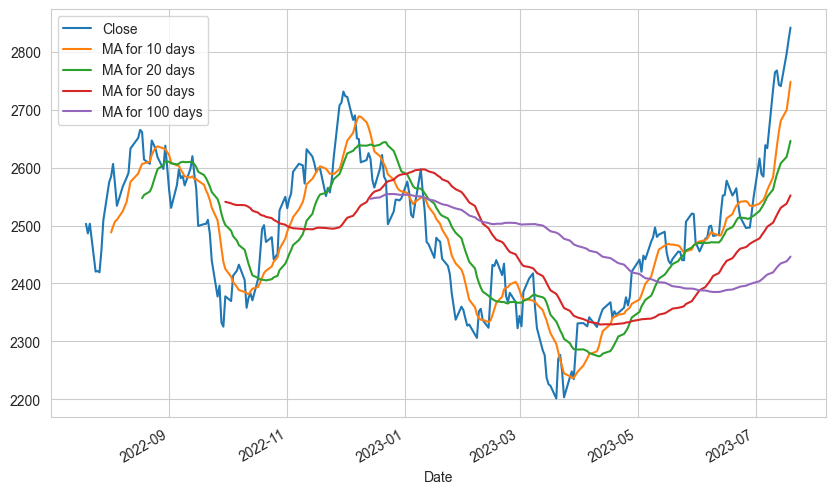

In [11]:
RELIANCE_NS[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(figsize=(10,6))

## Section B - Daily Return Analysis

Now we have done some baseline analysis. We are now going to analyze the **Risk of the stock.**

Thus we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the RELIANCE_NS stock.

<Axes: xlabel='Date'>

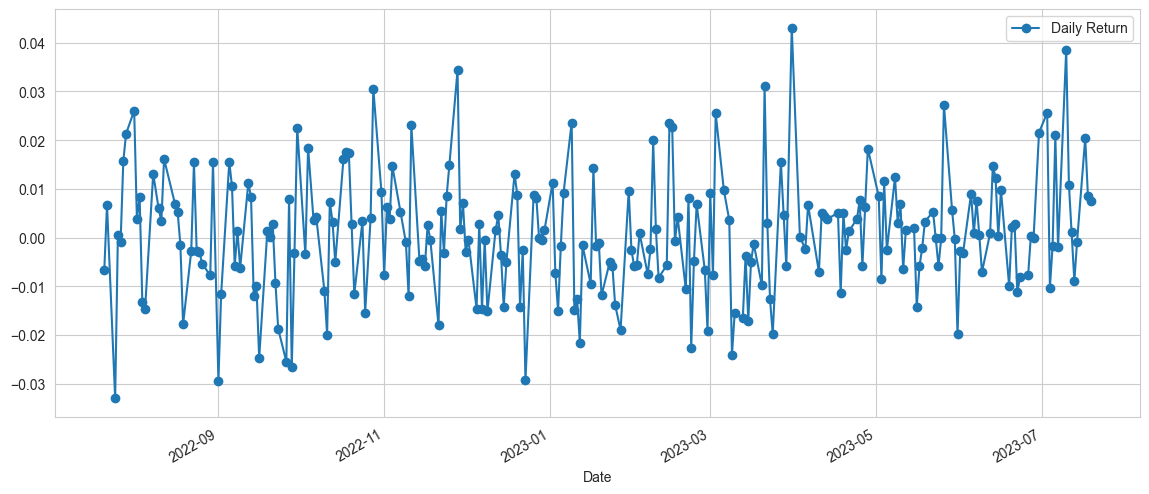

In [12]:
# We'll use pct_change to find the percent change for each day
RELIANCE_NS['Daily Return'] = RELIANCE_NS['Close'].pct_change()

# Lets plot the daily return percentage
RELIANCE_NS['Daily Return'].plot(figsize=(14,6), legend=True, linestyle='-', marker='o')

Let's look at the average daily return using a histogram. 

<Axes: xlabel='Daily Return', ylabel='Count'>

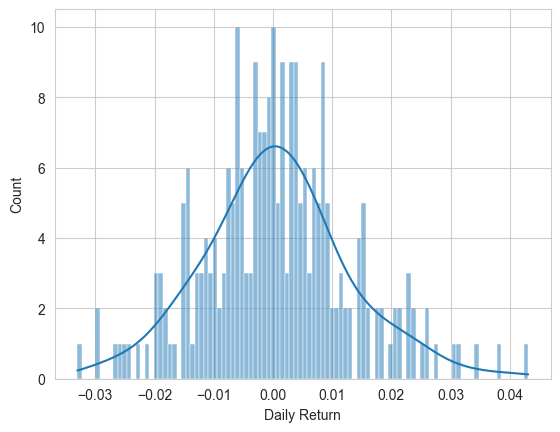

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(RELIANCE_NS['Daily Return'].dropna(), bins=100,kde=True)

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = yf.download(tech_list, start, end)['Close']
closingprice_df.head(10)

[*********************100%***********************]  4 of 4 completed


,INFY.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,
2022-07-20,1515.300049,2503.000000,508.600006,3164.800049
2022-07-21,1532.900024,2486.300049,512.049988,3177.300049
2022-07-22,1506.300049,2503.100098,513.700012,3171.000000
2022-07-25,1503.599976,2420.399902,517.799988,3166.750000
2022-07-26,1451.150024,2421.500000,514.200012,3115.899902
2022-07-27,1471.050049,2419.199951,528.200012,3188.850098
2022-07-28,1517.400024,2457.100098,532.450012,3260.500000
2022-07-29,1549.699951,2509.449951,528.349976,3301.899902
2022-08-01,1551.050049,2574.850098,533.750000,3298.800049


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the *RELIANCE_NS* stock.

In [15]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()
tech_returns.head()

,INFY.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,
2022-07-20,NaN,NaN,NaN,NaN
2022-07-21,0.011615,-0.006672,0.006783,0.003950
2022-07-22,-0.017353,0.006757,0.003222,-0.001983
2022-07-25,-0.001793,-0.033039,0.007981,-0.001340
2022-07-26,-0.034883,0.000455,-0.006952,-0.016058


Now we can compare the daily percentage return of two stocks to check how correlated. 
First let's see a stock compared to itself.

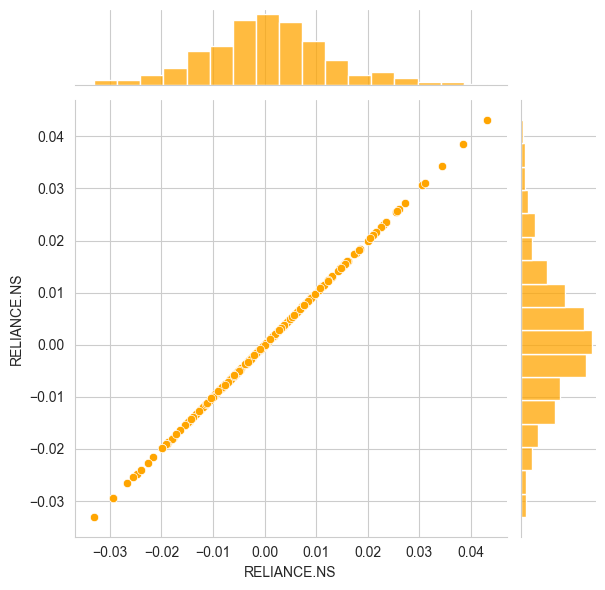

In [16]:
# Comparing reliance to itself should show a perfectly linear relationship
sns.jointplot(x='RELIANCE.NS',y='RELIANCE.NS',data=tech_returns,color='orange')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

So let's go ahead and compare Reliance and TCS the same way

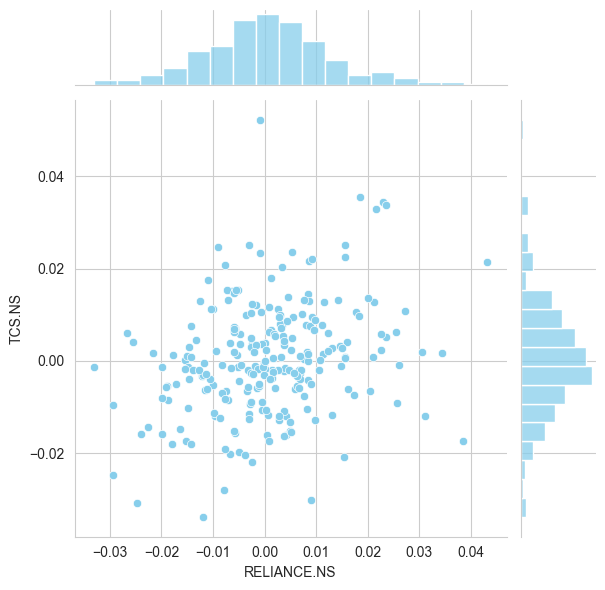

In [17]:
# We'll use joinplot to compare the daily returns of Reliance and TCS.

sns.jointplot(data=tech_returns,x='RELIANCE.NS',y='TCS.NS', kind='scatter', color='skyblue')


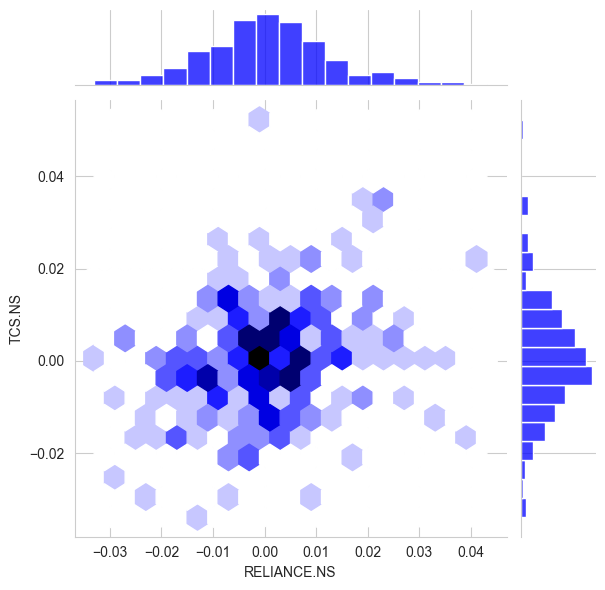

In [18]:
# with Hex plot
sns.jointplot(x='RELIANCE.NS',y='TCS.NS',data=tech_returns, kind='hex', color='blue')

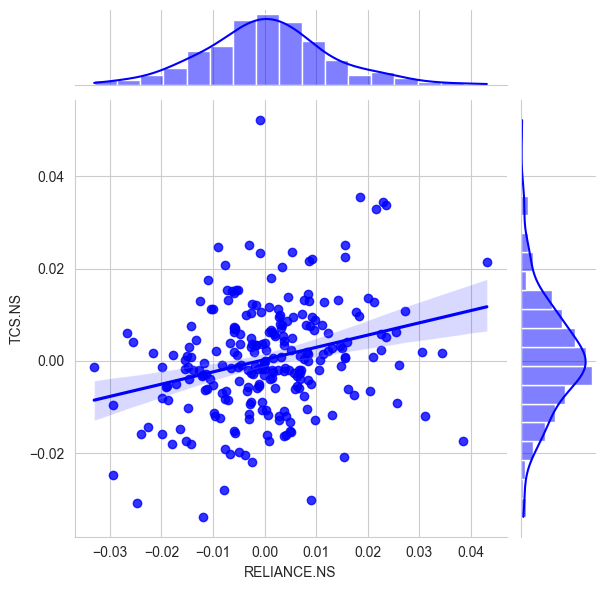

In [19]:
# Lets check out for Reliance and TCS with reg jointplot
sns.jointplot(x='RELIANCE.NS',y='TCS.NS',data=tech_returns, kind='reg', color='blue')

Seaborn makes it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list by using **sns.pairplot()** 

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


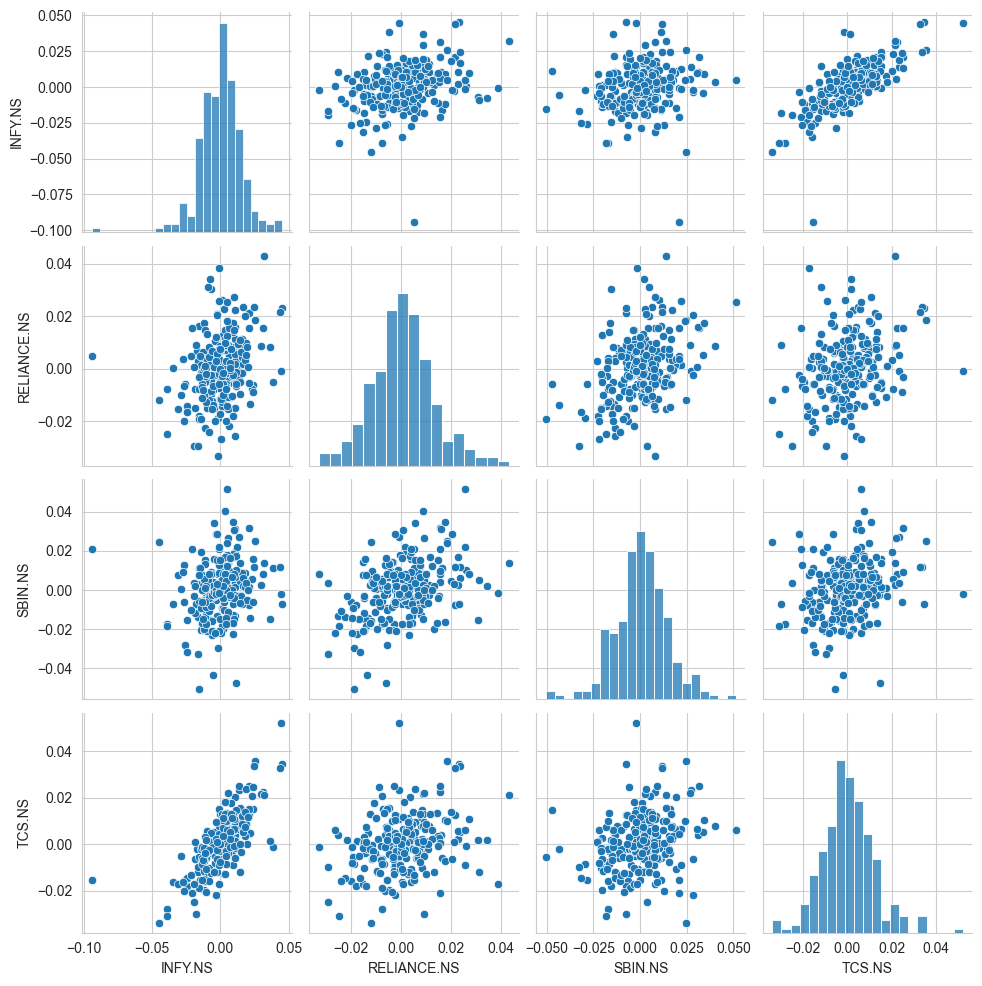

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())

We can do a correlation plot to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices. We see the interesting relationship between TCS and Infosys.

<Axes: >

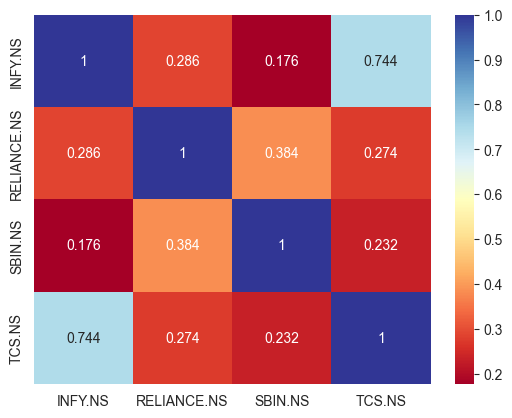

In [21]:
# Let's use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='RdYlBu')

<Axes: >

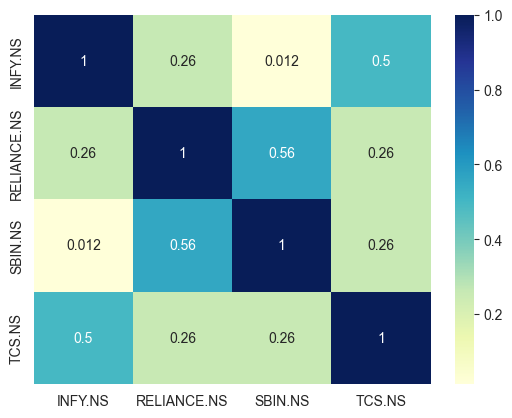

In [22]:
sns.heatmap(closingprice_df.corr(),annot=True,cmap='YlGnBu')

##### Here we see that among these 4 companies the closing price for SBI and Reliance are highly correlated.

# RISK ANALYSIS
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk)

In [23]:
# defining a new DataFrame as clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()
rets.head()

,INFY.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,
2022-07-21,0.011615,-0.006672,0.006783,0.003950
2022-07-22,-0.017353,0.006757,0.003222,-0.001983
2022-07-25,-0.001793,-0.033039,0.007981,-0.001340
2022-07-26,-0.034883,0.000455,-0.006952,-0.016058
2022-07-27,0.013713,-0.000950,0.027227,0.023412


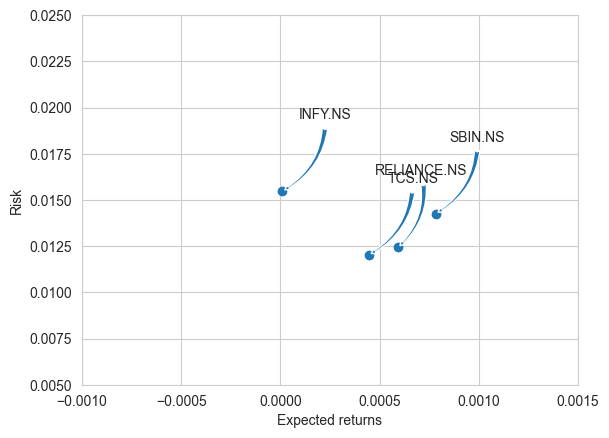

In [24]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std())

# Set the x and y limits of the plot 
plt.xlim([-0.001,0.0015])
plt.ylim([0.005,0.025])


#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say all these stocks except *Infosys* have lower risk and positive expected returns.

# VALUE AT RISK:
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

## Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles

<Axes: xlabel='Daily Return', ylabel='Count'>

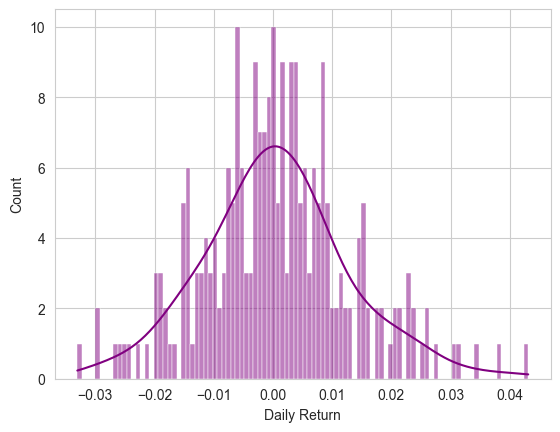

In [25]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(RELIANCE_NS['Daily Return'].dropna(),bins=100,color='purple', kde=True)


Now we can use quantile to get the risk value for the stock.

In [26]:
# The 0.05 empirical quantile of daily returns

# For Reliance stocks
rets["RELIANCE.NS"].quantile(0.05)

-0.019091286795927004

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 Lakh rupees investment, our one-day 5% VaR is 0.019 * 100000 = ₹1,900

In [27]:
# For TCS stocks
rets["TCS.NS"].quantile(0.05)

-0.01774000893365449

In [28]:
# For Infosys stocks
rets["INFY.NS"].quantile(0.05)

-0.02386190604857405

In [29]:
# For SBI stocks
rets["SBIN.NS"].quantile(0.05)

-0.02064817698307589

## Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as **drift**, which is the average daily return multiplied by the change of time. The second term is known as **shock**, for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [30]:
rets.head()

,INFY.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,
2022-07-21,0.011615,-0.006672,0.006783,0.003950
2022-07-22,-0.017353,0.006757,0.003222,-0.001983
2022-07-25,-0.001793,-0.033039,0.007981,-0.001340
2022-07-26,-0.034883,0.000455,-0.006952,-0.016058
2022-07-27,0.013713,-0.000950,0.027227,0.023412


In [31]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for Relaince
mu = rets.mean()['RELIANCE.NS']

# Now let's grab the volatility of the stock from the std() of the average return for Reliance
sigma = rets.std()['RELIANCE.NS']

In [32]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [33]:
# For Reliance Stock - RELIANCE.NS
RELIANCE_NS.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2022-07-20,2540.000000,2542.500000,2486.250000,2503.000000,2495.486816,11041036,NaN,NaN,NaN,NaN,NaN
2022-07-21,2494.000000,2500.000000,2467.300049,2486.300049,2478.836914,7625468,NaN,NaN,NaN,NaN,-0.006672
2022-07-22,2500.000000,2516.300049,2495.000000,2503.100098,2495.586670,5062651,NaN,NaN,NaN,NaN,0.006757
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2413.134521,10665470,NaN,NaN,NaN,NaN,-0.033039
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2414.231445,5216466,NaN,NaN,NaN,NaN,0.000455


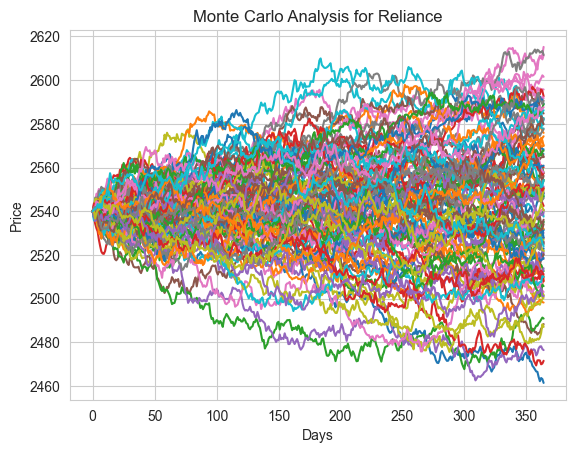

In [34]:
start_price = 2540

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Reliance')
plt.show()

In [35]:
TCS_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,3107.800049,3171.949951,3098.050049,3164.800049,3071.116943,3402251
2022-07-21,3167.000000,3184.000000,3144.050049,3177.300049,3083.247070,2420640
2022-07-22,3185.000000,3197.000000,3143.500000,3171.000000,3077.133545,2075886
2022-07-25,3165.000000,3186.449951,3149.100098,3166.750000,3073.009033,1797504
2022-07-26,3164.699951,3168.899902,3096.500000,3115.899902,3023.664307,2639367


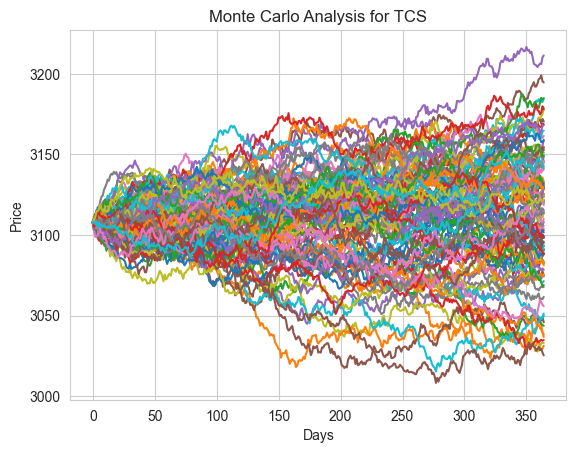

In [36]:
start_price = 3107.800049

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TCS')
plt.show()

In [37]:
INFY_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,1501.250000,1525.800049,1500.000000,1515.300049,1459.405640,5079392
2022-07-21,1517.000000,1535.449951,1503.099976,1532.900024,1476.356445,5008061
2022-07-22,1534.000000,1540.000000,1492.150024,1506.300049,1450.737671,7020642
2022-07-25,1480.099976,1517.150024,1480.099976,1503.599976,1448.137085,7859626
2022-07-26,1496.650024,1496.650024,1445.000000,1451.150024,1397.621826,7268273


Text(0.5, 1.0, 'Monte Carlo Analysis for Infosys')

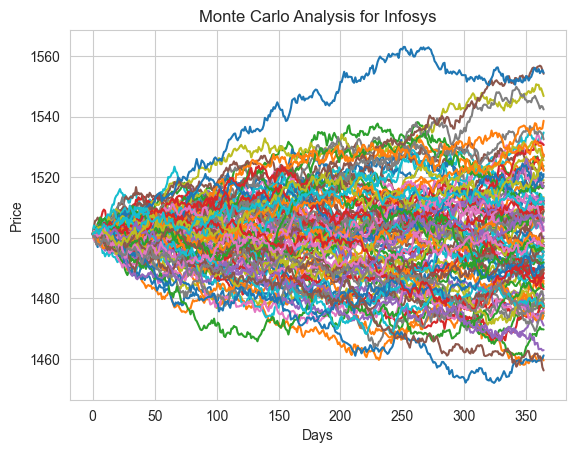

In [38]:
start_price = 1501.250000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Infosys')

In [39]:
SBIN_NS.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-20,501.000000,510.600006,500.399994,508.600006,498.905029,19280117
2022-07-21,509.799988,513.400024,506.750000,512.049988,502.289246,13814893
2022-07-22,513.450012,520.200012,511.200012,513.700012,503.907806,14699129
2022-07-25,513.400024,519.000000,509.149994,517.799988,507.929626,10229778
2022-07-26,517.700012,520.799988,513.099976,514.200012,504.398285,8862656


Text(0.5, 1.0, 'Monte Carlo Analysis for SBI')

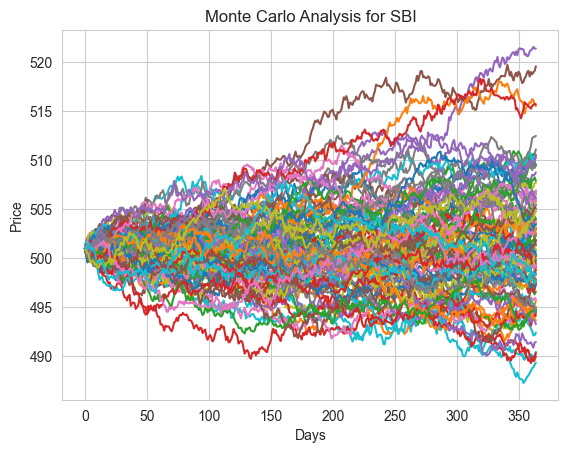

In [40]:
start_price = 501.000000

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for SBI')

In [41]:
# Lets start with Reliance stock price
start_price = 2540.000000

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Reliance(RELIANCE.NS) after 365 days')

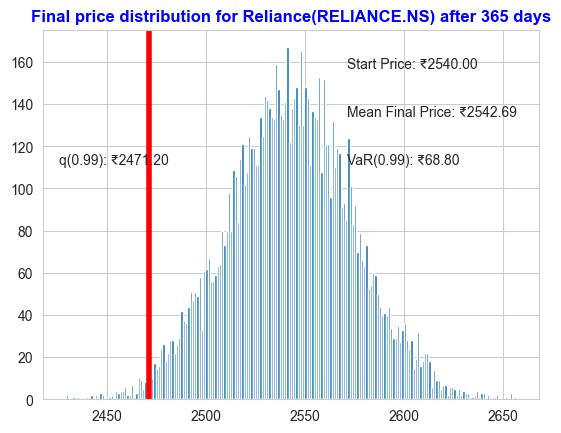

In [42]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: ₹%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: ₹%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): ₹%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): ₹%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Reliance(RELIANCE.NS) after %s days" % days, weight='bold', color='Blue')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Reliance stock(RELIANCE.NS), which looks to be ₹68.80 for every investment of2540.00 (The price of one initial RELIANCE.NS Stock).

This basically means for every initial RELIANCE.NS stock you purchase you're putting about ₹68.80 at risk 99% of the time from our Monte Carlo Simulation.

Let's do this for all remaining companies

In [46]:
# For TCS Stock Price
start_price = 3107.800049
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TCS Stock(TCS.NS) after 365 days')

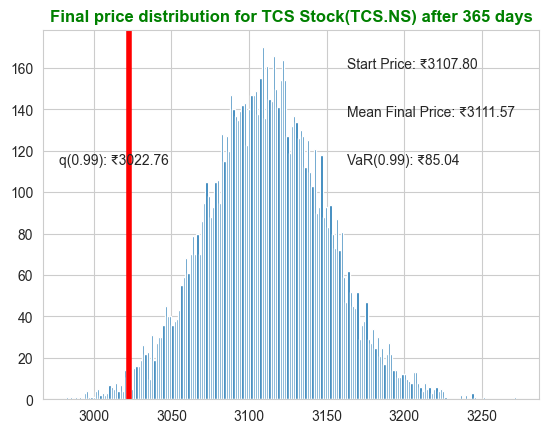

In [44]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s='Start Price: ₹%.2f' % start_price)
plt.figtext(0.6,0.7, s='Mean Final Price: ₹%.2f' % simulations.mean())
plt.figtext(0.6,0.6, s='VaR(0.99): ₹%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): ₹%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(label="Final price distribution for TCS Stock(TCS.NS) after %s days" % days, weight='bold', color='Green')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the TCS stock(TCS.NS), which looks to be ₹85.04 for every investment of 3107.80(The price of one initial TCS.NS Stock).

This basically means for every initial TCS.NS stock you purchase you're putting about ₹85.04 at risk 99% of the time from our Monte Carlo Simulation.

In [47]:
# For Infosys Stock Price
start_price = 1501.250000
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Infosys Stock(INFY.NS) after 365 days')

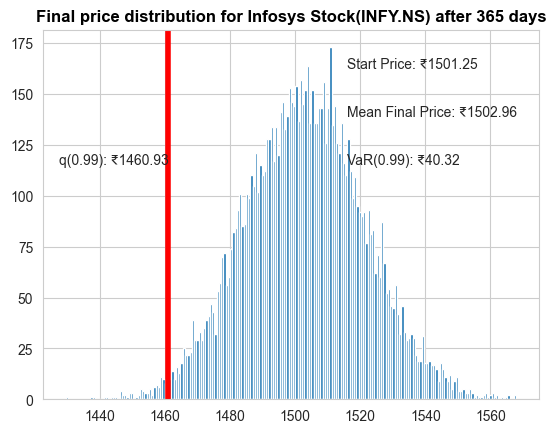

In [48]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s='Start Price: ₹%.2f' % start_price)
plt.figtext(0.6,0.7, s='Mean Final Price: ₹%.2f' % simulations.mean())
plt.figtext(0.6,0.6, s='VaR(0.99): ₹%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): ₹%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(label="Final price distribution for Infosys Stock(INFY.NS) after %s days" % days, weight='bold', color='Black')

Great! This basically means for every initial INFY.NS stock you purchase you're putting about ₹40.32 at risk 99% of the time from our Monte Carlo Simulation.

In [50]:
# For SBI Stock Price
start_price = 501.000000
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for SBI Stock(SBI.NS) after 365 days')

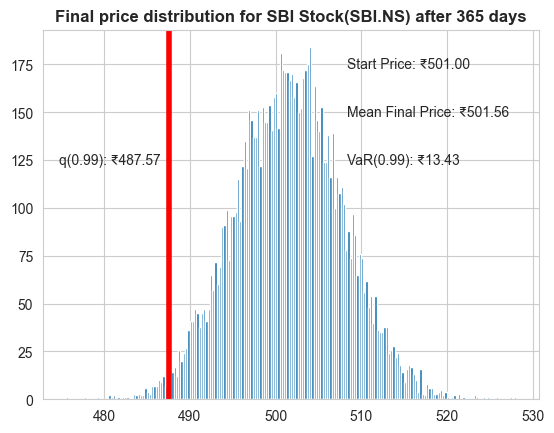

In [51]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s='Start Price: ₹%.2f' % start_price)
plt.figtext(0.6,0.7, s='Mean Final Price: ₹%.2f' % simulations.mean())
plt.figtext(0.6,0.6, s='VaR(0.99): ₹%.2f' % (start_price - q))
plt.figtext(0.15, 0.6, s="q(0.99): ₹%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(label="Final price distribution for SBI Stock(SBI.NS) after %s days" % days, weight='bold')

Great! This basically means for every initial SBI.NS stock you purchase you're putting about ₹13.43 at risk 99% of the time from our Monte Carlo Simulation.

## Conclusion:

We have looked at the 1% empirical quantile of the final price distribution to estimate the value at Risk for the comapnies.
Based on our Monte Carlo Simulation, it can be inferred that for every initial stock purchase, there is a 99% chance that the money you are putting at risk is as follows: 



| Stock | Value at Risk(₹)| Start Price(₹) |
| --- | --- | --- |
| Reliance | 68.80 | 2540.00 |
| TCS | 85.04 | 3107.80 |
| Infosys | 40.32 | 1501.25 |
| SBI | 13.43 | 501.00 |